In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [453]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [454]:
df.shape

(200, 5)

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [456]:
# we don't need CustomerID as there are no null coustomers
df = df.drop('CustomerID', axis = 1)

In [457]:
df.describe(include = 'all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [458]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [459]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [460]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Note that the newer :func:`histplot` function offers more functionality, although
    its default behavior is somewhat different.
    
    .. note::
        This function always treats one of the variables as categorical and
        draws data at ordinal positions (0, 1, ... n) on the relevant axis,
        even when the data has a numeric or date type.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.    
    


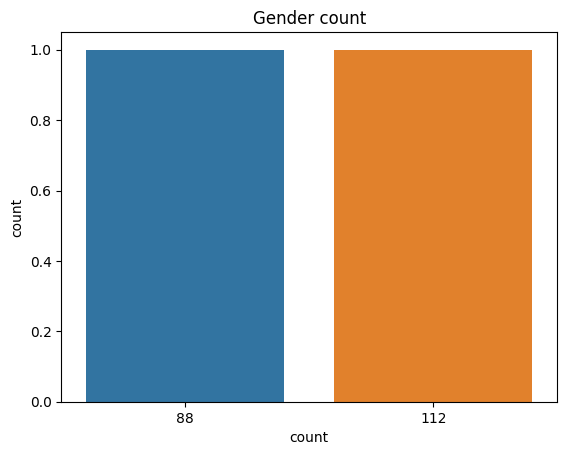

In [461]:
sns.countplot(data = df, x = df['Gender'].value_counts())
plt.title("Gender count")
plt.show()

In [462]:
df.duplicated().any()

False

In [463]:
numerical = df.select_dtypes(include = 'int64')

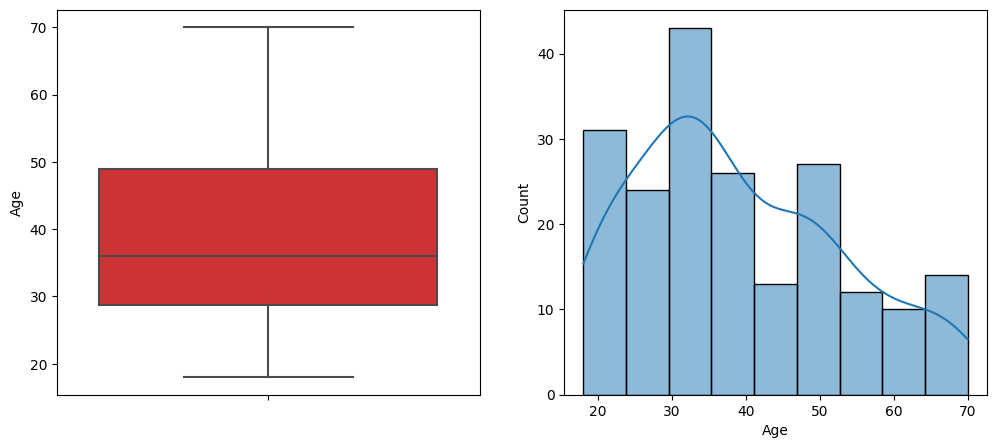

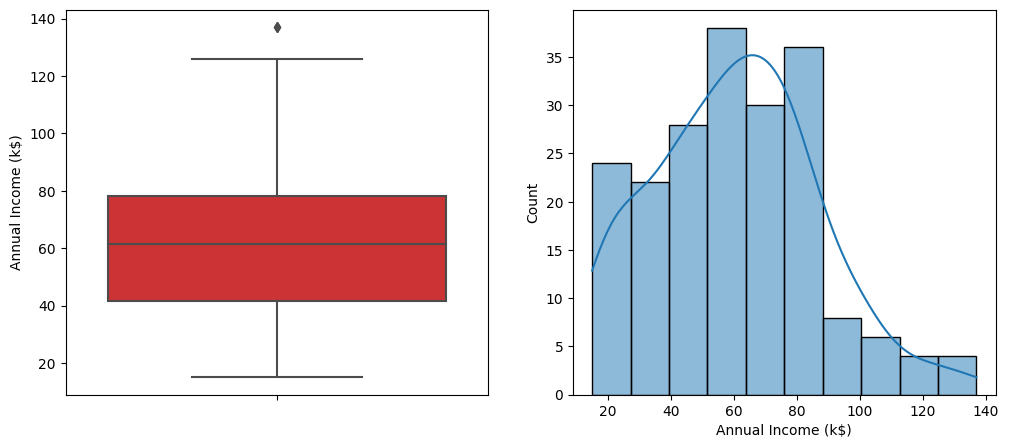

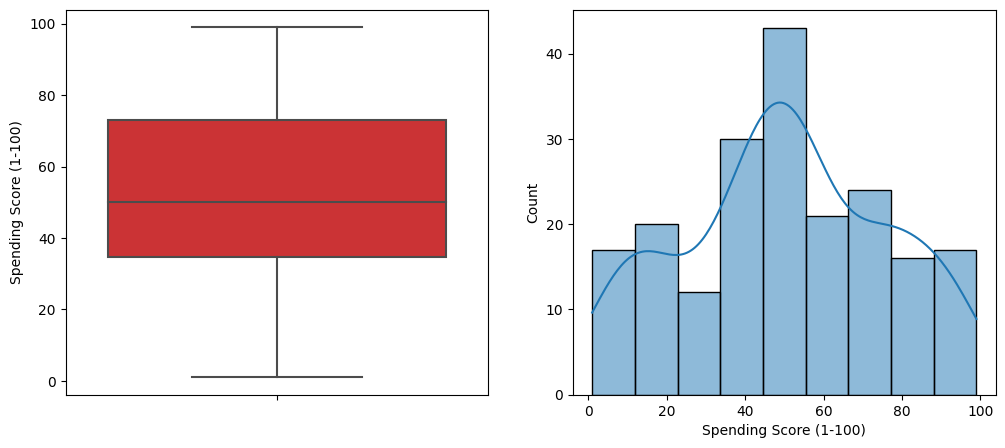

In [464]:
for n in numerical.columns:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.boxplot(data= df , y = df[n], palette = 'Set1')
    plt.subplot(1,2,2)
    sns.histplot(data = df, x = df[n], kde = True)
    plt.show()

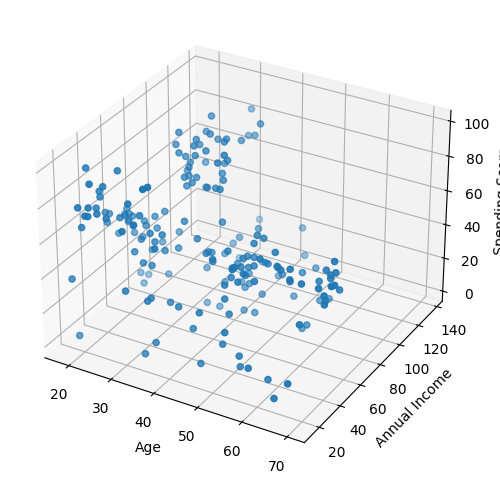

In [465]:
figure = plt.figure(figsize = (10,6))
ax = figure.add_subplot(projection = '3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

In [466]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first = True)

In [467]:
df.tail()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True
199,30,137,83,True


In [468]:
inertia = []
max_k = 12
k_values = range(2, max_k +1)
silhouette_scores = []
df_basic = df.drop(columns = ['Age','Gender_Male'], axis = 1)

In [469]:
for k in k_values:
    km = KMeans(n_clusters = k , random_state = 42, max_iter = 1000)
    cluster_labels = km.fit_predict(df_basic)
    sil_score = silhouette_score(df_basic , cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(km.inertia_)

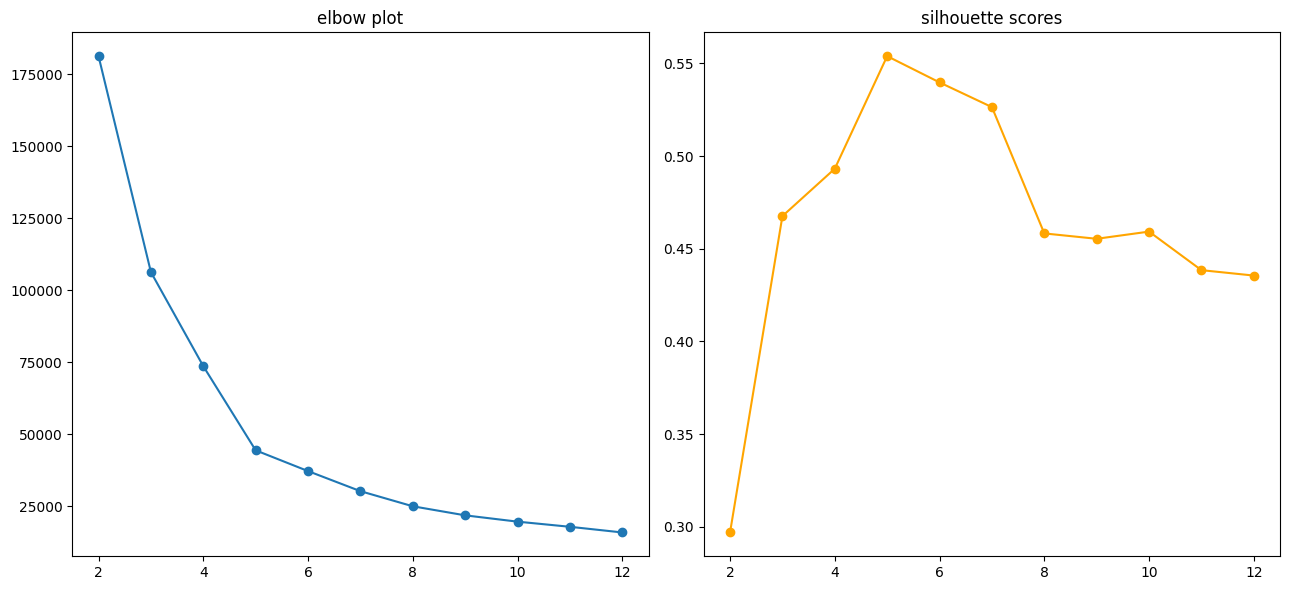

In [470]:
plt.figure(figsize  = (13,6))
plt.subplot(1,2,1)
plt.plot(k_values,inertia , marker = 'o')
plt.title("elbow plot")
plt.subplot(1,2,2)
plt.plot(k_values ,silhouette_scores, marker = 'o', color = 'orange' )
plt.title("silhouette scores")
plt.tight_layout()
plt.show()

In [471]:
kmeans = KMeans(n_clusters = 5, random_state = 52 ,max_iter = 1000)
cluster_labels = kmeans.fit_predict(df_basic)

In [472]:
df_basic['cluster'] = cluster_labels

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

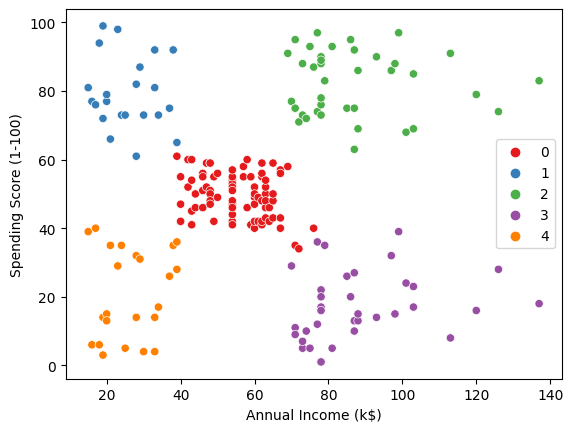

In [473]:
sns.scatterplot(data = df_basic , x = df_basic['Annual Income (k$)'], y = df_basic['Spending Score (1-100)'], hue = cluster_labels, palette = 'Set1')

In [474]:
# to get the average spending score by every cluster

avg = df_basic.groupby('cluster').mean()
print(avg)

         Annual Income (k$)  Spending Score (1-100)
cluster                                            
0                 55.296296               49.518519
1                 25.727273               79.363636
2                 86.538462               82.128205
3                 88.200000               17.114286
4                 26.304348               20.913043


In [475]:
spending_avg = df_basic.groupby('cluster')['Spending Score (1-100)'].mean()

[]

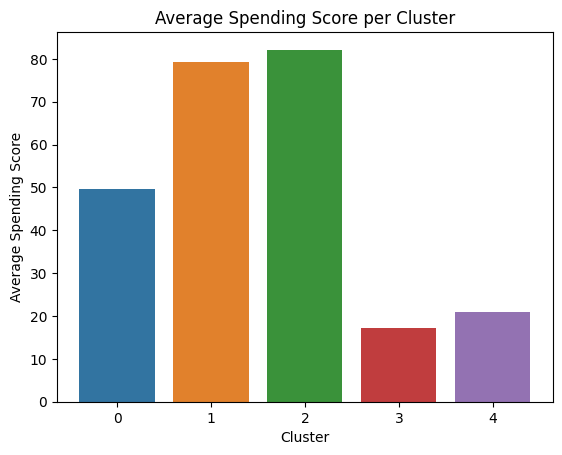

In [476]:
sns.barplot(x =spending_avg.index, y = spending_avg.values)
plt.xlabel("Cluster")
plt.ylabel("Average Spending Score")
plt.title("Average Spending Score per Cluster")
plt.plot()

# Now with all features : age, income, gender and spending score

In [477]:
inertia = []
max_k = 12
k_values = range(2, max_k +1)
silhouette_scores = []
df_kmeans = df.copy()

In [478]:
for k in k_values:
    km = KMeans(n_clusters = k , random_state = 42, max_iter = 1000)
    cluster_labels = km.fit_predict(df_kmeans)
    sil_score = silhouette_score(df_kmeans , cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(km.inertia_)

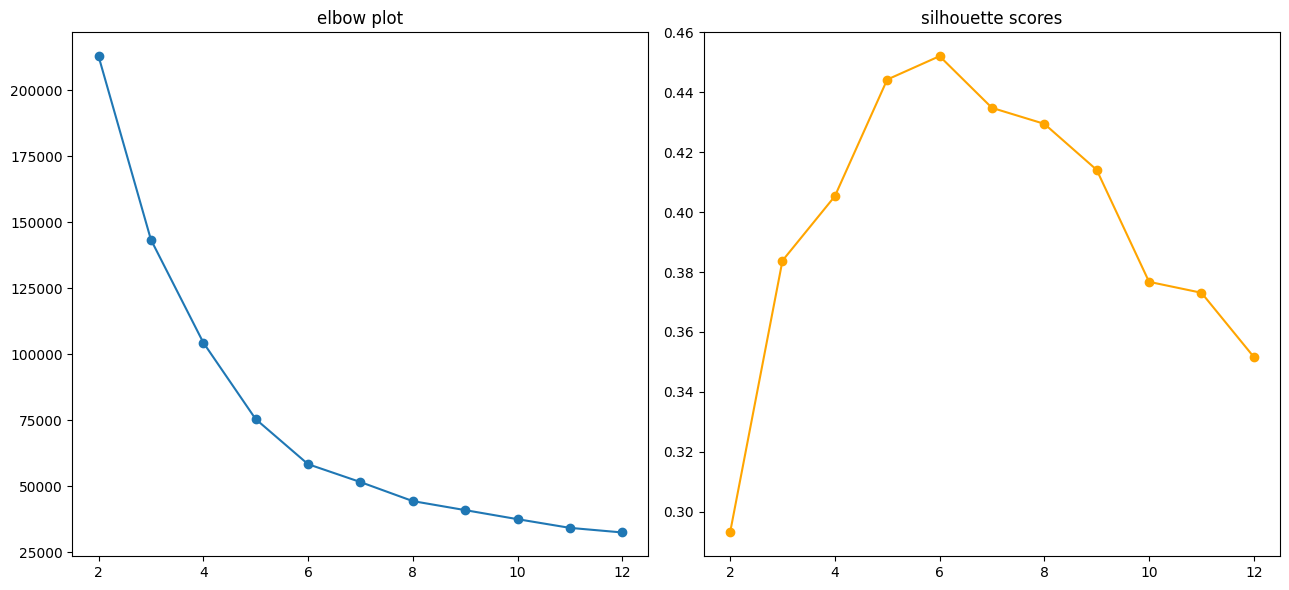

In [479]:
plt.figure(figsize  = (13,6))
plt.subplot(1,2,1)
plt.plot(k_values,inertia , marker = 'o')
plt.title("elbow plot")
plt.subplot(1,2,2)
plt.plot(k_values ,silhouette_scores, marker = 'o', color = 'orange' )
plt.title("silhouette scores")
plt.tight_layout()
plt.show()

In [480]:
kmeans = KMeans(n_clusters = 5, random_state = 52 ,max_iter = 1000)
cluster_labels = kmeans.fit_predict(df_kmeans)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

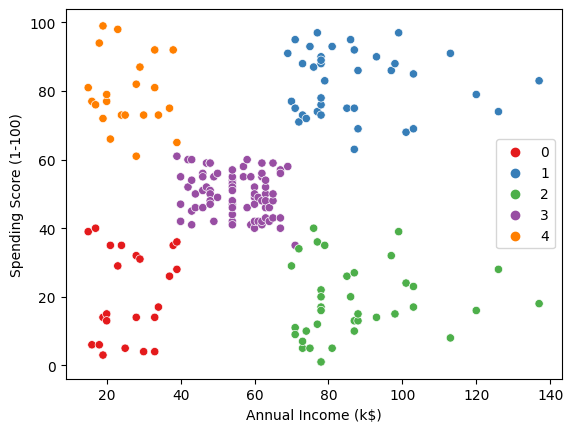

In [481]:
sns.scatterplot(data = df_kmeans , x = df_kmeans['Annual Income (k$)'], y = df_kmeans['Spending Score (1-100)'], hue = cluster_labels, palette = 'Set1')

In [482]:
df_kmeans['clusters'] = cluster_labels

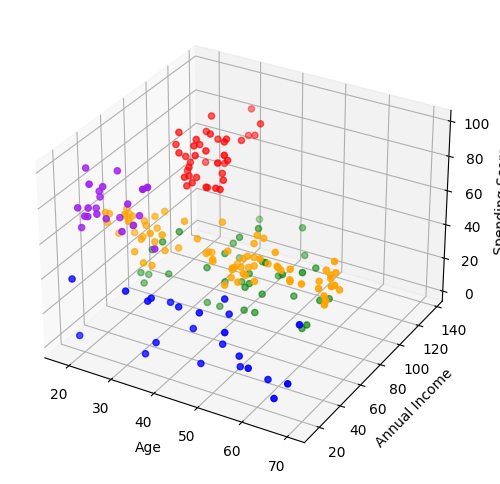

In [483]:
cluster_colors = { 
    0: '#0000FF',
    1:'#FF0000',
    2:'#008000',
    3 :'#FFA500',
    4:'#A020F0',
    5:'#964B00'

}
colors = df_kmeans['clusters'].map(cluster_colors)

figure = plt.figure(figsize = (10,6))
ax = figure.add_subplot(projection = '3d')
scatter = ax.scatter(df_kmeans['Age'], df_kmeans['Annual Income (k$)'], df_kmeans['Spending Score (1-100)'],c = colors)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

# DBSCAN method to improve the latest Kmeans method

In [484]:
df_db = df.copy()
df_db = df_db.drop(columns = 'Gender_Male', axis = 1)

In [485]:
df_db.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [486]:
scale  = StandardScaler()
df_db_scaled = scale.fit_transform(df_db)

In [487]:
k = 6
neighbor = NearestNeighbors(n_neighbors = k)
neighbors_fit = neighbor.fit(df_db_scaled)
distances, indices = neighbors_fit.kneighbors(df_db_scaled)

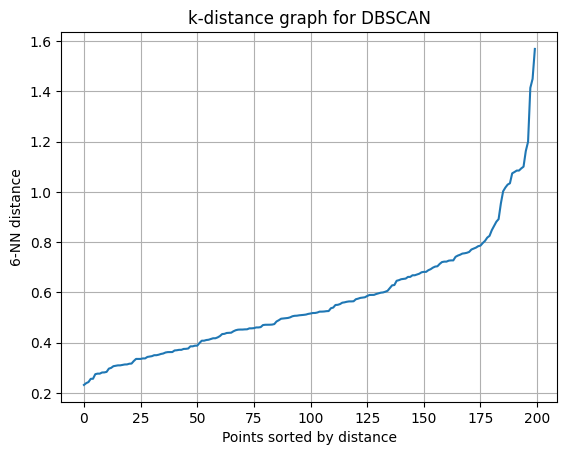

In [488]:
distances = np.sort(distances[:, k-1]) 
plt.plot(distances)
plt.ylabel(f"{k}-NN distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance graph for DBSCAN")
plt.grid(True)
plt.show()

In [489]:
dbscan = DBSCAN(eps = 0.55, min_samples = 5)
cluster_labels_db = dbscan.fit_predict(df_db_scaled)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

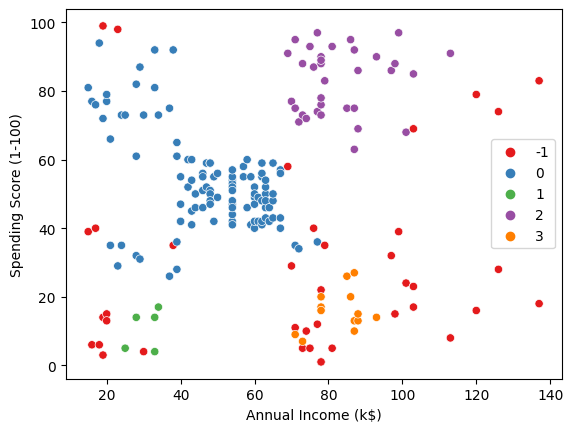

In [490]:
sns.scatterplot(data = df_db , x = df_db['Annual Income (k$)'], y = df_db['Spending Score (1-100)'], hue = cluster_labels_db, palette = 'Set1')

In [491]:
 df_db['clusters'] = cluster_labels_db

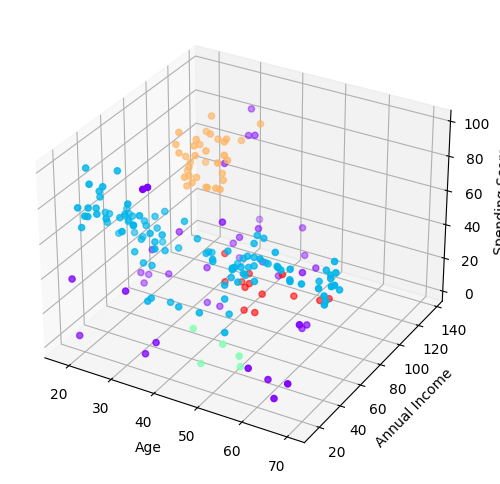

In [492]:
figure = plt.figure(figsize = (10,6))
ax = figure.add_subplot(projection = '3d')
scatter = ax.scatter(df_db['Age'], df_db['Annual Income (k$)'], df_db['Spending Score (1-100)'],c=cluster_labels_db, cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

### As we can see, the DBSCAN not the best for data like that as there is not tight blobs with consisitent desnity and DBSCAN is so sensitive for the density of points and locations of clusters must be far enough